In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=['date'])

df


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [22]:
#Clean data

df = df[
    (df['value'] >= df['value'].quantile(0.025))&
    (df['value'] <= df['value'].quantile(0.975))
]

df



,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0.5, 0, 'Date')

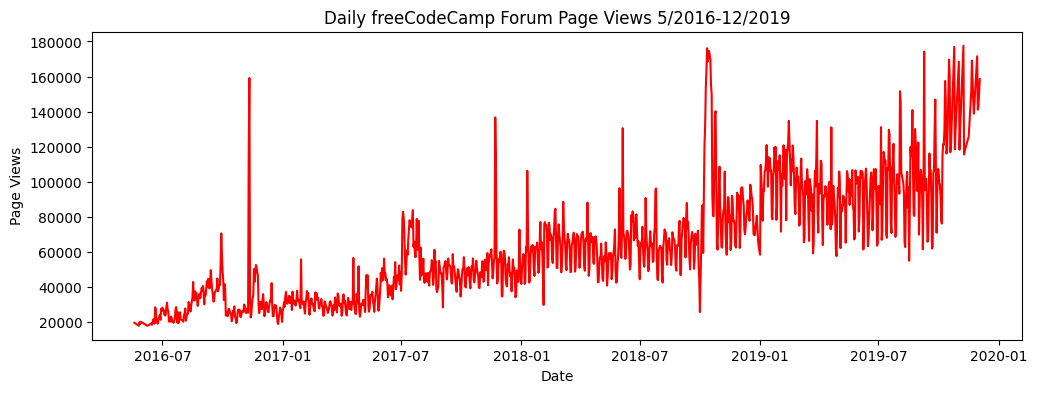

In [35]:

fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df.index, df['value'], 'red')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_ylabel('Page Views')
ax.set_xlabel('Date')




In [70]:
# Copy and modify data for monthly bar plot
df_bar = df

df_bar.loc[:, ('month')] = df_bar.index.month
df_bar.loc[:, ('year')] = df_bar.index.year

In [71]:
#format the data 
df_bar = df_bar.groupby(['year','month'])['value'].mean()
df_bar = df_bar.unstack()

df_bar


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


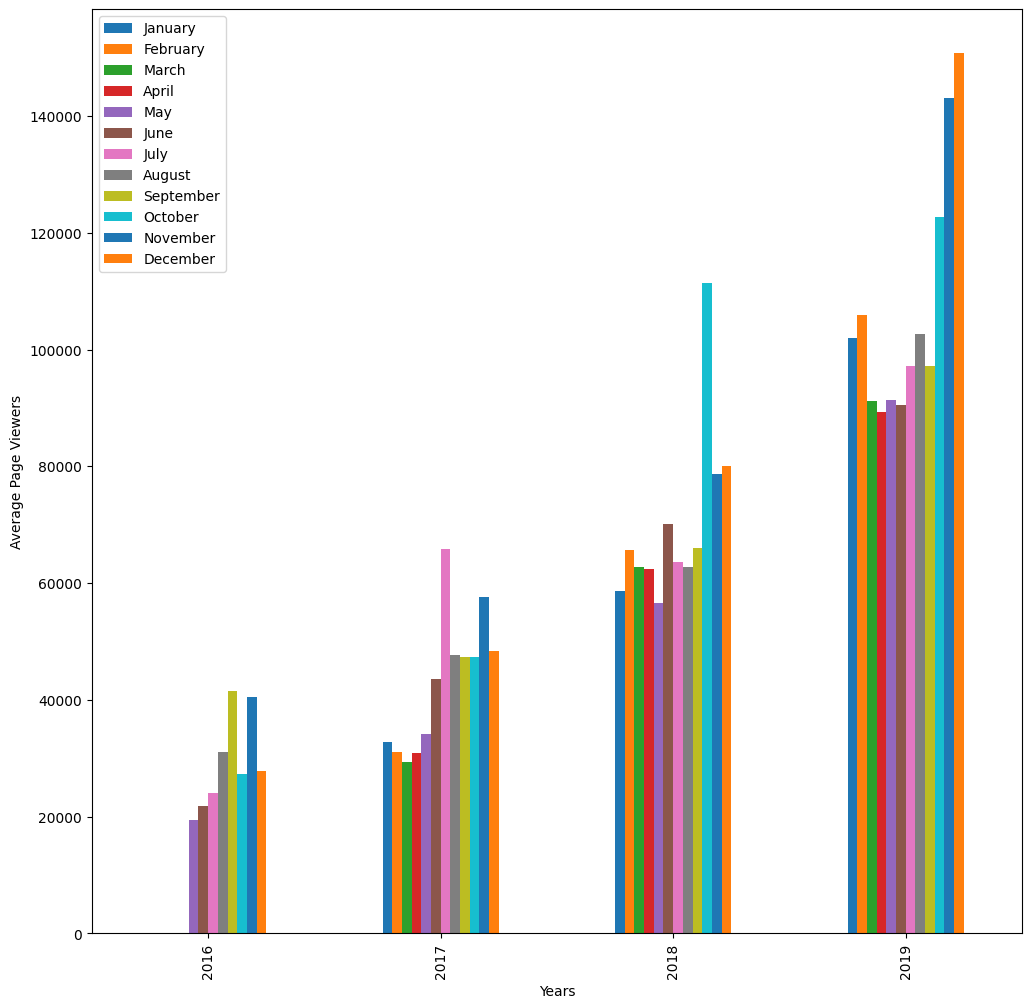

In [74]:
# Draw bar plot

fig = df_bar.plot(kind='bar', figsize= (12,12), xlabel = 'Years', ylabel = 'Average Page Viewers', legend=True)

plt.legend(['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])




In [ ]:

# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
df_box.loc[:, ('month_num')] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')

df_box


,date,value,month,year,month_num
955,2019-01-24,114541,Jan,2019,1
950,2019-01-19,79858,Jan,2019,1
952,2019-01-21,103240,Jan,2019,1
951,2019-01-20,78679,Jan,2019,1
956,2019-01-25,119836,Jan,2019,1
...,...,...,...,...,...
921,2018-12-21,85083,Dec,2018,12
569,2017-12-31,42616,Dec,2017,12
568,2017-12-30,50169,Dec,2017,12
567,2017-12-29,72819,Dec,2017,12


Text(0.5, 0, 'Year')

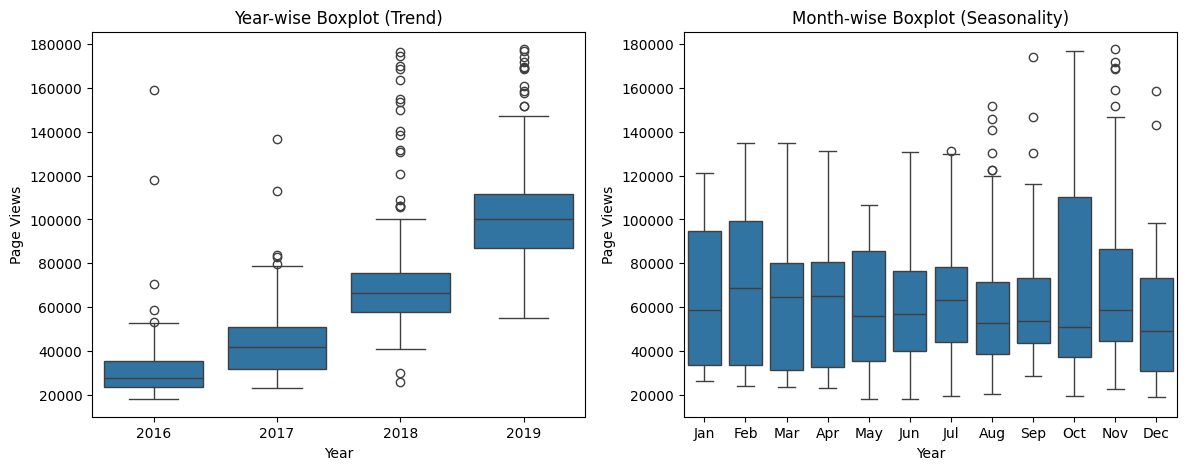

In [ ]:
fig, axis = plt.subplots(figsize=(14,5), ncols=2, nrows=1)

axis[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axis[0], color=)
axis[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axis[1])

axis[0].set_title('Year-wise Boxplot (Trend)')
axis[0].set_ylabel('Page Views')
axis[0].set_xlabel('Year')

axis[1].set_title('Month-wise Boxplot (Seasonality)')
axis[1].set_ylabel('Page Views')
axis[1].set_xlabel('Year')